In [49]:
import torch
from torchvision.datasets import MNIST

In [69]:
device = torch.device("mps")

if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")



True

In [51]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)


In [76]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
dataiter = iter(trainloader)
images, labels = next(dataiter)

In [77]:
images.shape

torch.Size([128, 1, 28, 28])

In [78]:
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [79]:
import matplotlib.pyplot as plt

In [80]:
img = images[0]

In [81]:
img.shape

torch.Size([1, 28, 28])

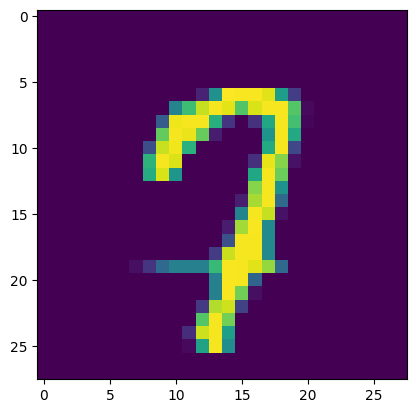

In [82]:
plt.imshow(img[0, :, :])

In [83]:
print(labels[0])

tensor(7)


In [84]:
## Building a neural network

from torch import nn

class DigitNetworkNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [90]:
import time
from torch.optim import Adam, SGD


In [91]:
start_time = time.time()

model = DigitNetworkNetwork()

criterion = nn.NLLLoss()
optimizer = SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        print(f"Epoch time: {start_time - time.time()}")
        start_time = time.time()

Training loss: -0.10158951607530814
Epoch time: -2.396359920501709
Training loss: -0.1039967844322292
Epoch time: -2.386997938156128
Training loss: -0.10696001670190267
Epoch time: -2.3340089321136475
Training loss: -0.1109135907723197
Epoch time: -2.3085367679595947
Training loss: -0.1166209461274686
Epoch time: -2.3386950492858887


In [92]:
# Training in gpu
start_time = time.time()
device = torch.device("mps")
model = DigitNetworkNetwork().to(device)

criterion = nn.NLLLoss()
optimizer = Adam(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        print(f"Epoch time: {start_time - time.time()}")
        start_time = time.time()

Training loss: -0.7376034192121359
Epoch time: -3.0509729385375977
Training loss: -0.9207158004805478
Epoch time: -2.9185378551483154
Training loss: -0.9378302389624785
Epoch time: -2.914228916168213
Training loss: -0.9469933974971649
Epoch time: -2.9457321166992188
Training loss: -0.9528128826287764
Epoch time: -2.9334280490875244


In [113]:
val = model(images[:5])
val

tensor([[2.7048e-09, 9.9992e-01, 5.7723e-05, 1.6237e-07, 5.8027e-09, 7.1772e-07,
         9.2488e-07, 1.1722e-07, 2.2960e-05, 8.4013e-09],
        [1.2739e-07, 3.3283e-07, 1.4757e-04, 7.4643e-09, 1.7919e-06, 4.4227e-05,
         9.9966e-01, 1.2183e-11, 1.4376e-04, 5.6190e-09],
        [3.4795e-10, 2.4078e-05, 1.8890e-06, 2.0412e-04, 2.7938e-04, 3.8037e-06,
         3.1580e-09, 1.9728e-02, 3.4085e-05, 9.7972e-01],
        [1.1570e-10, 3.0803e-08, 7.9164e-08, 9.9998e-01, 1.6927e-10, 1.1679e-05,
         2.3941e-14, 2.1961e-07, 3.8433e-06, 8.4724e-07],
        [1.1443e-03, 3.0770e-07, 1.9817e-03, 2.5361e-08, 2.2363e-04, 4.4381e-03,
         9.9221e-01, 3.3917e-06, 1.7482e-09, 6.6416e-08]], device='mps:0',
       grad_fn=<SoftmaxBackward0>)

In [112]:
d = torch.exp(val)
torch.argmax(d, axis=1)

tensor([1, 6, 9, 3, 6], device='mps:0')

In [114]:
img = images[2]
img.shape


torch.Size([784])

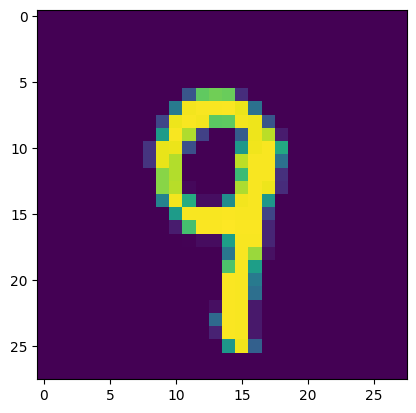

In [115]:
plt.imshow(img.reshape(28, 28).to("cpu"))

In [116]:
model.save("t.pt")

AttributeError: 'DigitNetworkNetwork' object has no attribute 'save'